In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset=pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
x=dataset.iloc[:,[3,4]].values

In [8]:
from sklearn.cluster import KMeans
wcss=[]

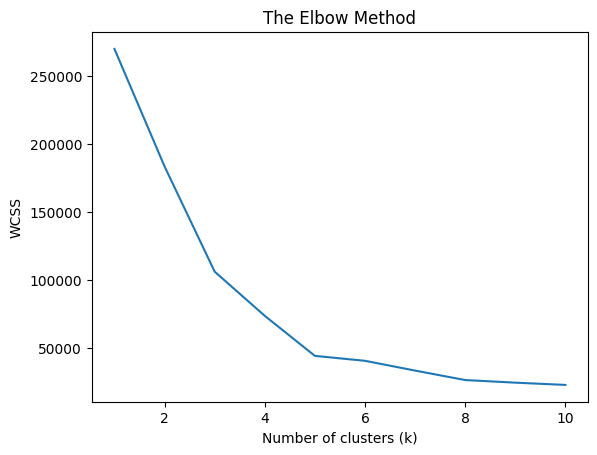

In [9]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)  

plt.title('The Elbow Method')

plt.xlabel('Number of clusters (k)')

plt.ylabel('WCSS')

plt.show()

In [10]:
wcss

[269981.28,
 183653.3289473684,
 106348.37306211119,
 73880.64496247195,
 44448.45544793371,
 40825.16946386946,
 33642.579220779226,
 26686.83778518778,
 24766.471609793443,
 23103.122085983916]

In [14]:
#train the dataset
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_predict=kmeans.fit_predict(x)

In [17]:
print(kmeans)

KMeans(n_clusters=5, random_state=42)


In [18]:
print(y_predict)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


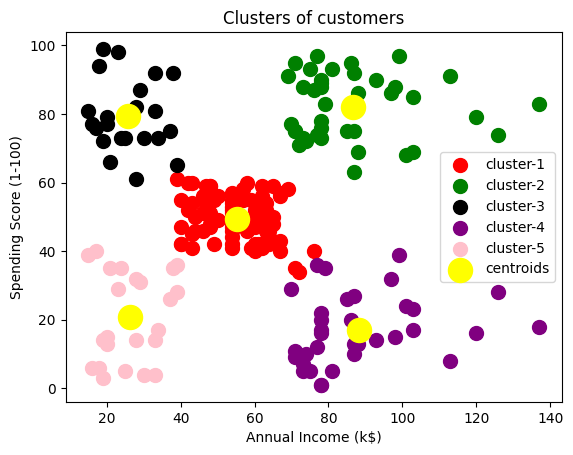

In [25]:
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],s=100,c='red',label='cluster-1')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],s=100,c='green',label='cluster-2')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],s=100,c='black',label='cluster-3')
plt.scatter(x[y_predict==3,0],x[y_predict==3,1],s=100,c='purple',label='cluster-4')
plt.scatter(x[y_predict==4,0],x[y_predict==4,1],s=100,c='pink',label='cluster-5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='centroids')

plt.title('Clusters of customers')

plt.xlabel('Annual Income (k$)')

plt.ylabel('Spending Score (1-100)')

plt.legend()

plt.show()